#### Import libraries

In [ ]:
import csv

with open('filename.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

In [1]:
import numpy as np # works with complex but one of the arguments must be complex
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # this is key to improving plot resolution

#### Generate Gaussian white noise input, x

In [2]:
n=10000 # number of samples
dt=0.001 # inter sample interval in seconds
x=np.random.randn(n) # Gaussian numbers
t=np.arange(0.0, n*dt, dt)

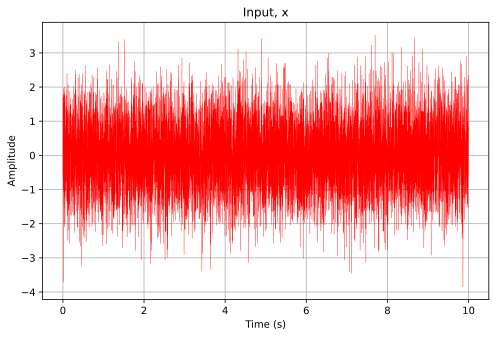

In [3]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(t, x, 'r',linewidth=0.4)
ax.set(xlabel='Time (s)', ylabel='Amplitude', title='Input, x')
ax.grid()
plt.show()

#### Determine probability density of input

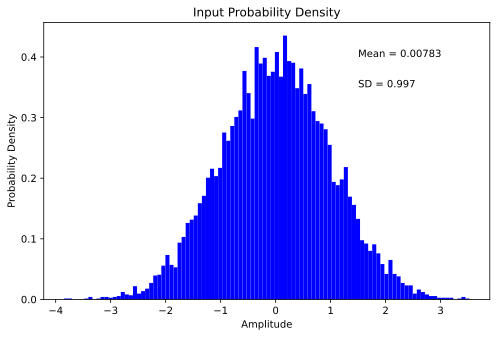

In [4]:
plt.hist(x, density=True, bins=100,facecolor='b')
plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Input Probability Density")  
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.text(1.5,0.4,'Mean = ' + '{0:.3g}'.format(np.mean(x)),fontsize=10)
plt.text(1.5,0.35,'SD = ' + '{0:.3g}'.format(np.std(x)),fontsize=10)
#plt.xlim(0, 2)
plt.show()

#### Compare input probability density with Gaussian density having same mean and standard deviation

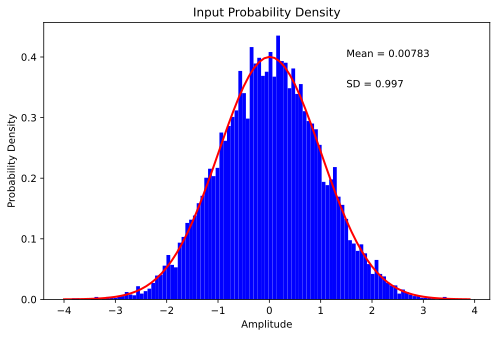

In [5]:
xmean=np.mean(x)
xsd=np.std(x)
a=np.arange(-4,4,0.1)
pdf=np.exp(-0.5*((a-xmean)/xsd)**2)/(xsd*np.sqrt(2*np.pi))
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(a,pdf, 'r',linewidth=2)
plt.hist(x, density=True, bins=100,facecolor='b') 
plt.title("Input Probability Density")  
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.text(1.5,0.4,'Mean = ' + '{0:.3g}'.format(xmean),fontsize=10)
plt.text(1.5,0.35,'SD = ' + '{0:.3g}'.format(xsd),fontsize=10)
#plt.xlim(0, 2)
plt.show()

#### Determine Input Auto-correlation Function 

In [6]:
cxx2=np.correlate(x,x,mode='same') # computes the correlation function values out to n lags 
# (note that this should be constrained to m lags where m<<n)

In [7]:
tau=np.arange(-0.5*n*dt, 0.5*n*dt, dt) # auto-correlation function lags

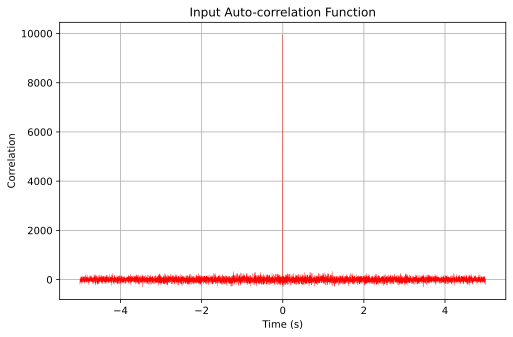

In [8]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(tau, cxx2, 'r',linewidth=0.4)
ax.set(xlabel='Time (s)', ylabel='Correlation', title='Input Auto-correlation Function')
ax.grid()
plt.show()

Note that auto-correlation functions are symetric about a lag of 0. Note also that we have a spike at lag zero and the
correlation values are near zero for non-zero lags. This is expected when the signal is white (i.e., has a flat power spectrum).

Because of its symmetry, just the positive lag side of the auto-correlation function is usually plotted:

#### Show One-sided Input Auto-correlation Function

In [9]:
tau=np.arange(0, 0.5*n*dt, dt) # auto-correlation function lags

In [10]:
cxx=cxx2[round(n/2):n] # extract the last n/2 values 

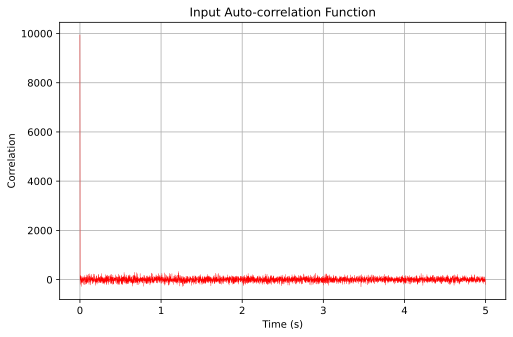

In [11]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(tau,cxx, 'r',linewidth=0.4)
ax.set(xlabel='Time (s)', ylabel='Correlation', title='Input Auto-correlation Function')
ax.grid()
plt.show()

Note that the auto-correlation function has been calculated out to a lag of 5 s. The duration of the input was 10 s. 
Usually the maximum lag of the auto-correlation function is set to be around 10x less than the duration of the signal. 
Lets do this:

In [12]:
m=500 # number of auto-correlation function values
cxx=cxx[0:m]
tau=np.arange(0, m*dt, dt) # auto-correlation function lags

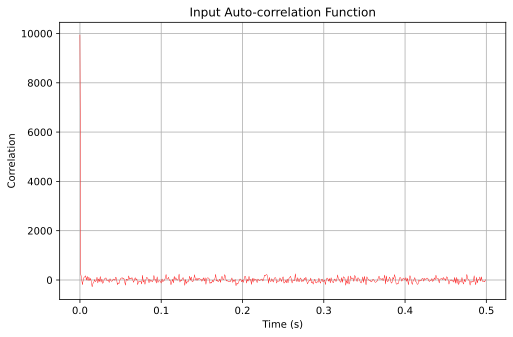

In [13]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(tau,cxx, 'r',linewidth=0.4)
ax.set(xlabel='Time (s)', ylabel='Correlation', title='Input Auto-correlation Function')
ax.grid()
plt.show()

#### Calculate the Input Power Spectrum

There are a few ways to determine the power spectrum of a signal. One way is to exploit the fact that the Fourier transform of the auto-correlation function of a signal is the power spectrum of that signal (the inverse Fourier transform of the power spectrum is the auto-correlation function) (the auto-corelataion function and the power spectrum are a Fourier transform pair).
Another more direct approach is to compute the magnitude of the square of the Fourier transform of the signal:

In [14]:
px = np.abs(np.fft.fft(x))**2

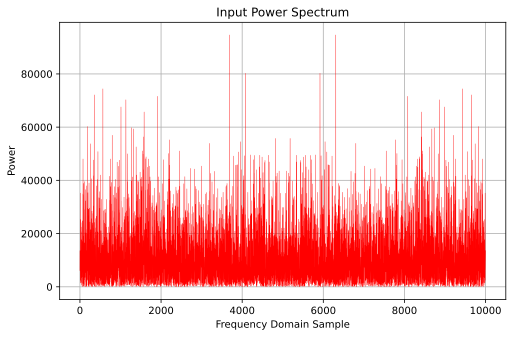

In [15]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(px, 'r',linewidth=0.4)
ax.set(xlabel='Frequency Domain Sample', ylabel='Power', title='Input Power Spectrum')
ax.grid()
plt.show()

If you look carefully you will note that this plot is symmetric about the middle. We only need the first half of these values and we want the horizontal axis to show frequency rather than frequency sample number:

In [16]:
px = (np.abs(np.fft.fft(x))**2)[0:round(n/2)] # need just the first n/2 values
f=np.arange(0.0,0.5/dt,1/(n*dt)) # generate frequencies

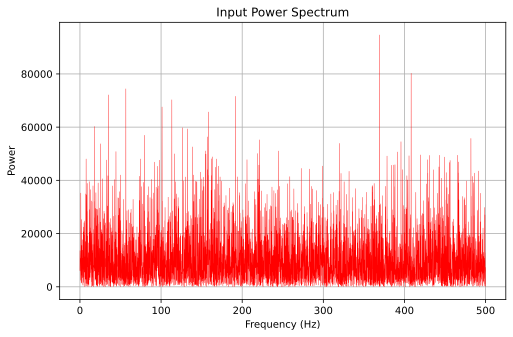

In [17]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(f,px, 'r',linewidth=0.4)
ax.set(xlabel='Frequency (Hz)', ylabel='Power', title='Input Power Spectrum')
ax.grid()
plt.show()

The sampling rate, 1000 Hz, is the reciprocal of the inter-sample interval (1 ms). Note that the power spectrum is defined from 0 to half the sampling rate: 1000 Hz/2 = 500 Hz
This is called the Nyquist frequency (or sometimes the Nyquist folding frequency) and is the highest frequency in the signal that can be determined. Indeed any frequencies higher than this in the orignal analog signal (before it was sampled) will get aliased down in to the 0 to Nyquist frequency range (see separate notes on aliasing).

Note also from the plot above that although "noisey" the power at each frequency is roughly the same (i.e. the power spectrum is flat). This is to be expected of white noise where via analogy with white light corresponds to all frequencies being equally present.

We can also determine the power spectrum using the periodogram function in the signal package:

In [18]:
from scipy import signal

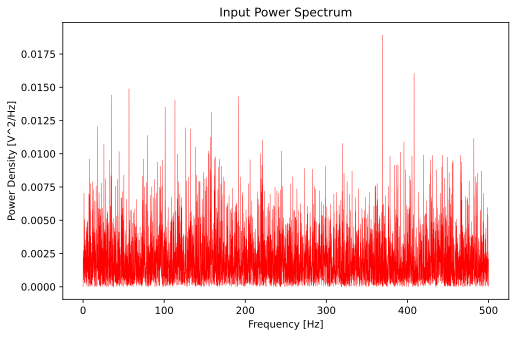

In [19]:
plt.rcParams['figure.figsize'] = [8, 5]
f, xpd = signal.periodogram(x, 1/dt)
plt.plot(f, xpd,'r',linewidth=0.4)
#plt.semilogy(f, xpd)
#plt.ylim([1e-7, 1e2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density [V^2/Hz]')
plt.title('Input Power Spectrum')
plt.show()

Sometimes it helps to plot the power spectrum on a log plot:

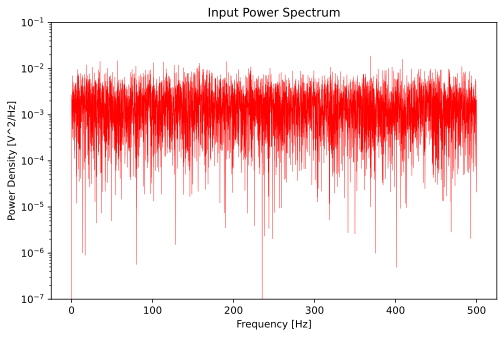

In [20]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.semilogy(f, xpd,'r',linewidth=0.4)
plt.ylim([1e-7, 0.1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density [V^2/Hz]')
plt.title('Input Power Spectrum')
plt.show()

The flat nature of the power spectrum (i.e., all frequencies equally present) of a white noise signal is clear here. See also the log log plot below:

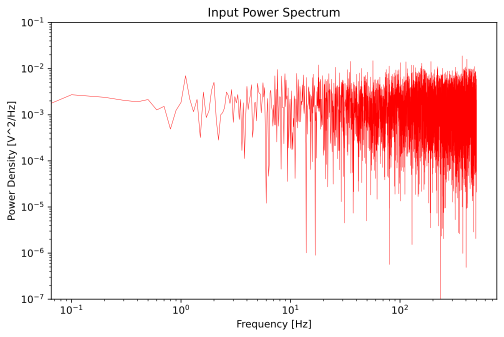

In [21]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.loglog(f, xpd,'r',linewidth=0.4)
plt.ylim([1e-7, 0.1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density [V^2/Hz]')
plt.title('Input Power Spectrum')
plt.show()

#### Generate second-order, low-pass, filter, h

We now generate a system (second-order, low-pass in this example) as represented by its impulse reponse function, h (linear filter). We will perturb this system with our input, x, to produce an output denoted by y below.

In [22]:
def filter2(tau, gain, damping, natfreq):
    # evaluates a second order low pass filter at lags, tau
    # note that natfreq is in rad/s
    if damping==1: # special case when damping == 1 (to avoid division by 0)
        damp=1.00000001
    else:
        damp=damping
    d=np.sqrt(complex(-1.0 + damp**2)) # note that complex is required to force np.sqrt to return a complex number
    return np.real((np.exp(-tau * damp * natfreq) * gain * natfreq * np.sinh(tau * natfreq * d))/d)

In [23]:
m=500 # number of lags in filter 
tau=np.arange(0.0, m*dt, dt)

In [24]:
gain = 2
damping = 0.3
natfreq = 2*np.pi*10 # in rad/s = 10 Hz
h=filter2(tau,gain,damping,natfreq) 

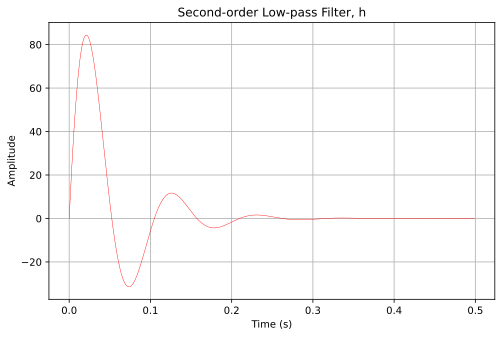

In [25]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(tau, h, 'r',linewidth=0.4)
ax.set(xlabel='Time (s)', ylabel='Amplitude', title='Second-order Low-pass Filter, h')
ax.grid()
plt.show()

#### Check area under filter (should be the system static gain (=2))

In [26]:
np.trapz(h,dx=dt)

1.9993831486075655

#### Convolve filter, h, with input, x, to produce output, y

The process by which an input is filtered by a system to produce an output is achieved by convolution. We say that the input is convolved with the system to produce the output.

In [27]:
y=dt * np.convolve(x,h)[0:n] # need just the first n values

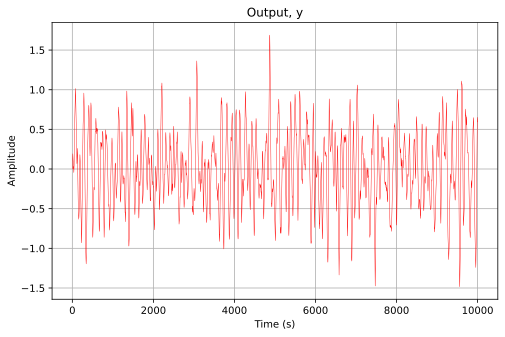

In [28]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(y, 'r',linewidth=0.4)
ax.set(xlabel='Time (s)', ylabel='Amplitude', title='Output, y')
ax.grid()
plt.show()

#### Determine probability density of output

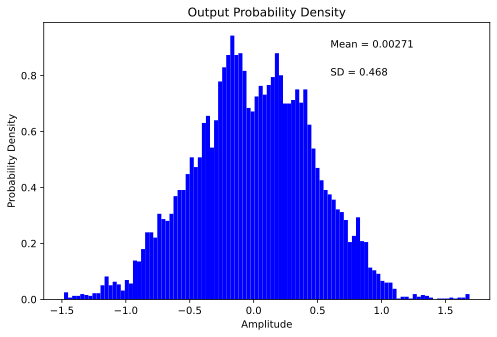

In [29]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.hist(y, density=True, bins=100,facecolor='b') 
plt.title("Output Probability Density")  
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.text(0.6,0.9,'Mean = ' + '{0:.3g}'.format(np.mean(y)),fontsize=10)
plt.text(0.6,0.8,'SD = ' + '{0:.3g}'.format(np.std(y)),fontsize=10)
plt.show()

#### Compare output probability density with Gaussian density having same mean and standard deviation

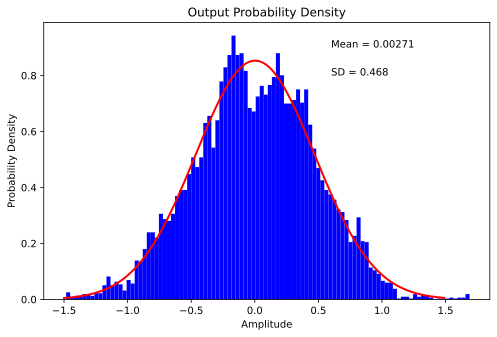

In [30]:
ymean=np.mean(y)
ysd=np.std(y)
a=np.arange(-1.5,1.5,0.01)
pdf=np.exp(-0.5*((a-ymean)/ysd)**2)/(ysd*np.sqrt(2*np.pi))
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(a,pdf, 'r',linewidth=2)
plt.hist(y, density=True, bins=100,facecolor='b') 
plt.title("Output Probability Density")  
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.text(0.6,0.9,'Mean = ' + '{0:.3g}'.format(ymean),fontsize=10)
plt.text(0.6,0.8,'SD = ' + '{0:.3g}'.format(ysd),fontsize=10)
#plt.xlim(0, 2)
plt.show()

#### Determine Output Auto-correlation Function

In [31]:
m=500 # number of auto-correlation function values
cyy=(np.correlate(y,y,mode='same'))[round(n/2):round(n/2)+m] # computes the correlation function values out to m lags
tau=np.arange(0, m*dt, dt) # auto-correlation function lags

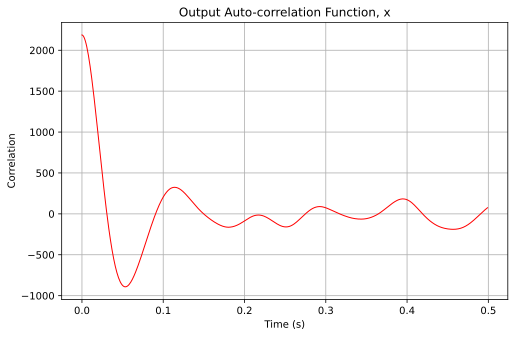

In [32]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(tau, cyy, 'r',linewidth=1)
ax.set(xlabel='Time (s)', ylabel='Correlation', title='Output Auto-correlation Function, x')
ax.grid()
plt.show()

Note that we now have non zero correlation function values at non zero lags. This is to be expected as the filter has turned the white noise input in to a non-white output (i.e., the output power spectrum will no longer be flat). Lets check this: 

#### Output Power Spectrum

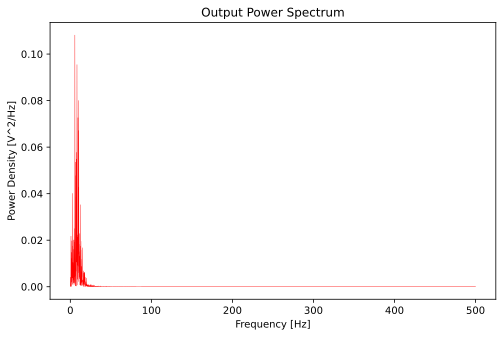

In [33]:
f, ypd = signal.periodogram(y, 1/dt)
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(f, ypd,'r',linewidth=0.4)
#plt.semilogy(f, xpd)
#plt.ylim([1e-7, 1e2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density [V^2/Hz]')
plt.title('Output Power Spectrum')
plt.show()

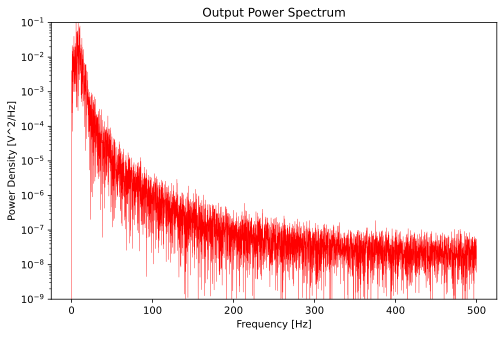

In [34]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.semilogy(f, ypd,'r',linewidth=0.4)
plt.ylim([1e-9, 0.1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density [V^2/Hz]')
plt.title('Output Power Spectrum')
plt.show()

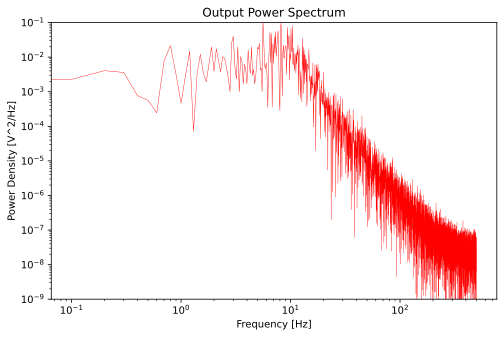

In [35]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.loglog(f, ypd,'r',linewidth=0.4)
plt.ylim([1e-9, 0.1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density [V^2/Hz]')
plt.title('Output Power Spectrum')
plt.show()

Note that the shape of this output power spectrum on log log axes follows that of the filter Bode plot gain.

#### Compute Input-Output Cross-correlation function

In [36]:
m=500 # number of cross-correlation function values
cxy=(np.correlate(y,x,mode='same'))#[round(n/2):round(n/2)+m] # computes the correlation function values out to m lags

In [37]:
tau=np.arange(-0.5*n*dt, 0.5*n*dt, dt) # auto-correlation function lags

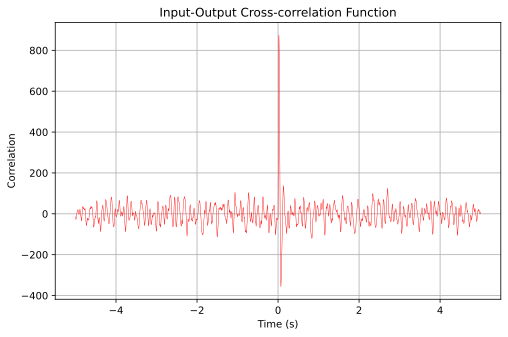

In [38]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(tau, cxy, 'r',linewidth=0.4)
ax.set(xlabel='Time (s)', ylabel='Correlation', title='Input-Output Cross-correlation Function')
ax.grid()
plt.show()

In [39]:
# Unlike the symmetric auto-correlation functions, cross-correlation functions are asymmetric.
# However for a causal (nonpredictive) system we only need the positive lag value. 
# So as before we will limit the number of cross-correlation function lags to m:

In [40]:
m=500 # number of cross-correlation function values
cxy=(np.correlate(y,x,mode='same'))[round(n/2):round(n/2)+m] # computes the correlation function values out to m lags
tau=np.arange(0, m*dt, dt) # cross-correlation function lags

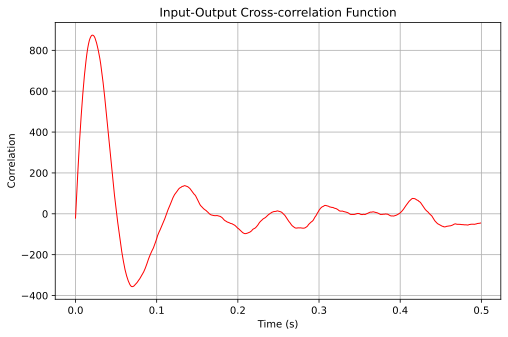

In [41]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(tau,cxy, 'r',linewidth=1)
ax.set(xlabel='Time (s)', ylabel='Correlation', title='Input-Output Cross-correlation Function')
ax.grid()
plt.show()

#### Nonparametric System Impulse Response Function Estimation

In [42]:
# An estimate of the cross-correlation function can be obtained by convolving the 
# input auto-correlation function with the system impulse reponse function.
# Conversely we can obtain an estimate of the system impulse response function by deconvolving the 
# input auto-correlation function from the input-output cross-correlation function. 
# This process can be implemented by solving a matrix equation in which ....
# Toeplitz matrtix inversion.

In [43]:
from scipy.linalg import toeplitz, solve_toeplitz

In [44]:
# A m x m Toeplitz matrix has a particular type of symmetry and has only m distinct values.
# For example if we have a m length 1D vector called a:

In [45]:
a=np.arange(0,5)
a

array([0, 1, 2, 3, 4])

In [46]:
# Then a Toeplitz matrix formed from a looks like:

In [47]:
toeplitz(a)

array([[0, 1, 2, 3, 4],
       [1, 0, 1, 2, 3],
       [2, 1, 0, 1, 2],
       [3, 2, 1, 0, 1],
       [4, 3, 2, 1, 0]])

In [48]:
# Note that the values in each top-down left-right diagonal are the same.

In [49]:
# We start by forming a Toeplitz matrix from the input auto-correlation function values.

In [50]:
from scipy.linalg import toeplitz, solve_toeplitz
#toe=toeplitz(cxx)

In [51]:
# We next form a matric equation involving this Toeplitz matrix and the cross-correlation function and 
# solve it using Levinson-Durbin recursion (which avoids having to form the huge 
# Toeplitz matrix explicitly)

In [52]:
hh=solve_toeplitz(cxx,cxy)/dt

In [53]:
tau=np.arange(0.0, m*dt, dt)

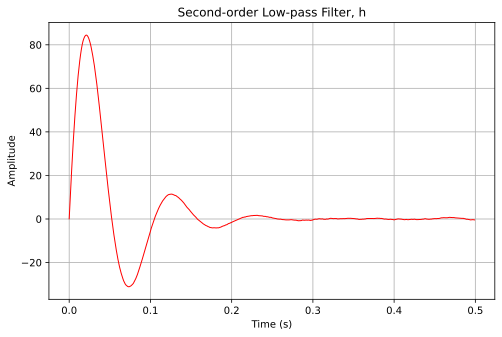

In [54]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(tau, hh, 'r',linewidth=1)
ax.set(xlabel='Time (s)', ylabel='Amplitude', title='Second-order Low-pass Filter, h')
ax.grid()
plt.show()

In [55]:
# We can now compare the original system impulse response function, h,
# with our estimated system impulse response function, hh:

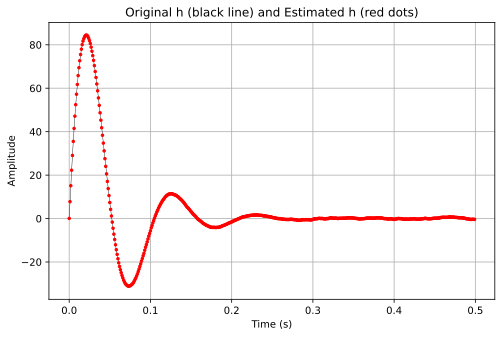

In [56]:
plt.rcParams['figure.figsize'] = [8, 5]
fig, ax = plt.subplots()
ax.plot(tau, h, 'k',linewidth=0.4)
ax.plot(tau, hh, 'r.', ms=5)
ax.set(xlabel='Time (s)', ylabel='Amplitude', title='Original h (black line) and Estimated h (red dots)')
ax.grid()
plt.show()

In [57]:
# Note that the estimated values of h are the same as the original values of h.

In [58]:
# Talk about need to use SVD some times

#### Parametric Estimation of the System Impulse Response Function

In [59]:
# The general equation of a second-order low-pass system impulse response function is given by 
# filter2 above.

In [60]:
# filter2(tau, gain, damping, natfreq):

In [61]:
# We can use nonlinear minization techniques to fit this function to our estimated 
# impulse response function to find the best fit paramaters: gain, natfreq and damping

In [62]:
# For this we need the scipy curve_fit function:
from scipy.optimize import curve_fit

In [63]:
 # Can be made to use Levenberg Marquardt but not if bounds are set as below:

In [64]:
(gainest, dampingest, natfreqest), pcov = curve_fit(filter2,tau,hh,bounds=(0.001,[10, 5, 200])) 

In [65]:
(gainest, dampingest, natfreqest)

(2.0083990004893706, 0.30378937685946694, 62.89476255760866)

In [66]:
(gain, damping, natfreq)

(2, 0.3, 62.83185307179586)

In [67]:
# bang on!

In [68]:
pcov

array([[1.56379421e-06, 2.36539002e-07, 1.05114989e-11],
       [2.36539002e-07, 7.48594855e-08, 6.83618598e-07],
       [1.05114989e-11, 6.83618598e-07, 1.41531755e-04]])

In [69]:
# The parameter variances are the main diagonal values and the parameter co-variances the off diagonal values.
